# **EDA and Result Plots**

**This notebook presents the EDA section in Chapter 6 of the report, as well as plotting all the results recored in the Spreadsheets in each Section 6.x using Matplotlib and Seaborn.**

In [ ]:
import pandas as pd
import numpy as np
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Update the file path accordingly to your drive
data = pd.read_csv(r'/content/drive/MyDrive/STAT0035/Cleaned_data.csv', index_col = 0)

In [ ]:
data_sub = data[['Date.time',
 'Power.me',
 'Pot.Power.me',
 'Wind.speed.me',
 'Power.factor.cosphi.me',
 'Front.bearing.temp.me',
 'Rear.bearing.temp.me',
 'Stator1.temp.me',
 'Nacelle.ambient.temp.me',
 'Nacelle.temp.me',
 'Transformer.temp.me',
 'Gear.oil.temp.me',
 'Generator.bearing.rear.temp.me',
 'Generator.bearing.front.temp.me',
 'Gear.oil.temp.me.1',
 'Top.box.temp.me',
 'Hub.temp.me',
 'Conv.Amb.temp.me',
 'Rotor.bearing.temp.me',
 'Transformer.cell.temp.me',
 'Motor.axis1.temp.me',
 'Motor.axis2.temp.me',
 'Motor.axis3.temp.me',
 'CPU.temp.me',
 'Rotor.speed.me',
 'Blade.ang.pitch.pos.A.me',
 'Blade.ang.pitch.pos.B.me',
 'Blade.ang.pitch.pos.C.me',
 'Gear.oil.inlet.press.me',
 'Gear.oil.pump.press.me',
 'Drive.train.acceleration.me',
 'Tower.Acceleration.x',
 'Tower.Acceleration.y',
 'turbine',
 'year']]


### Standardise all variables except date-time

In [ ]:
print(data_sub.info())
print(data_sub.describe())
print(data_sub.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018494 entries, 0 to 1169060
Data columns (total 35 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Date.time                        1018494 non-null  object 
 1   Power.me                         1018494 non-null  float64
 2   Pot.Power.me                     1018494 non-null  float64
 3   Wind.speed.me                    1018494 non-null  float64
 4   Power.factor.cosphi.me           1018493 non-null  float64
 5   Front.bearing.temp.me            1009827 non-null  float64
 6   Rear.bearing.temp.me             1009827 non-null  float64
 7   Stator1.temp.me                  1018494 non-null  float64
 8   Nacelle.ambient.temp.me          1009827 non-null  float64
 9   Nacelle.temp.me                  1009826 non-null  float64
 10  Transformer.temp.me              1009827 non-null  float64
 11  Gear.oil.temp.me                 1009825 non-null 

<ipython-input-14-9935b5d64318>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_sub.corr(), annot=True, cmap='coolwarm')


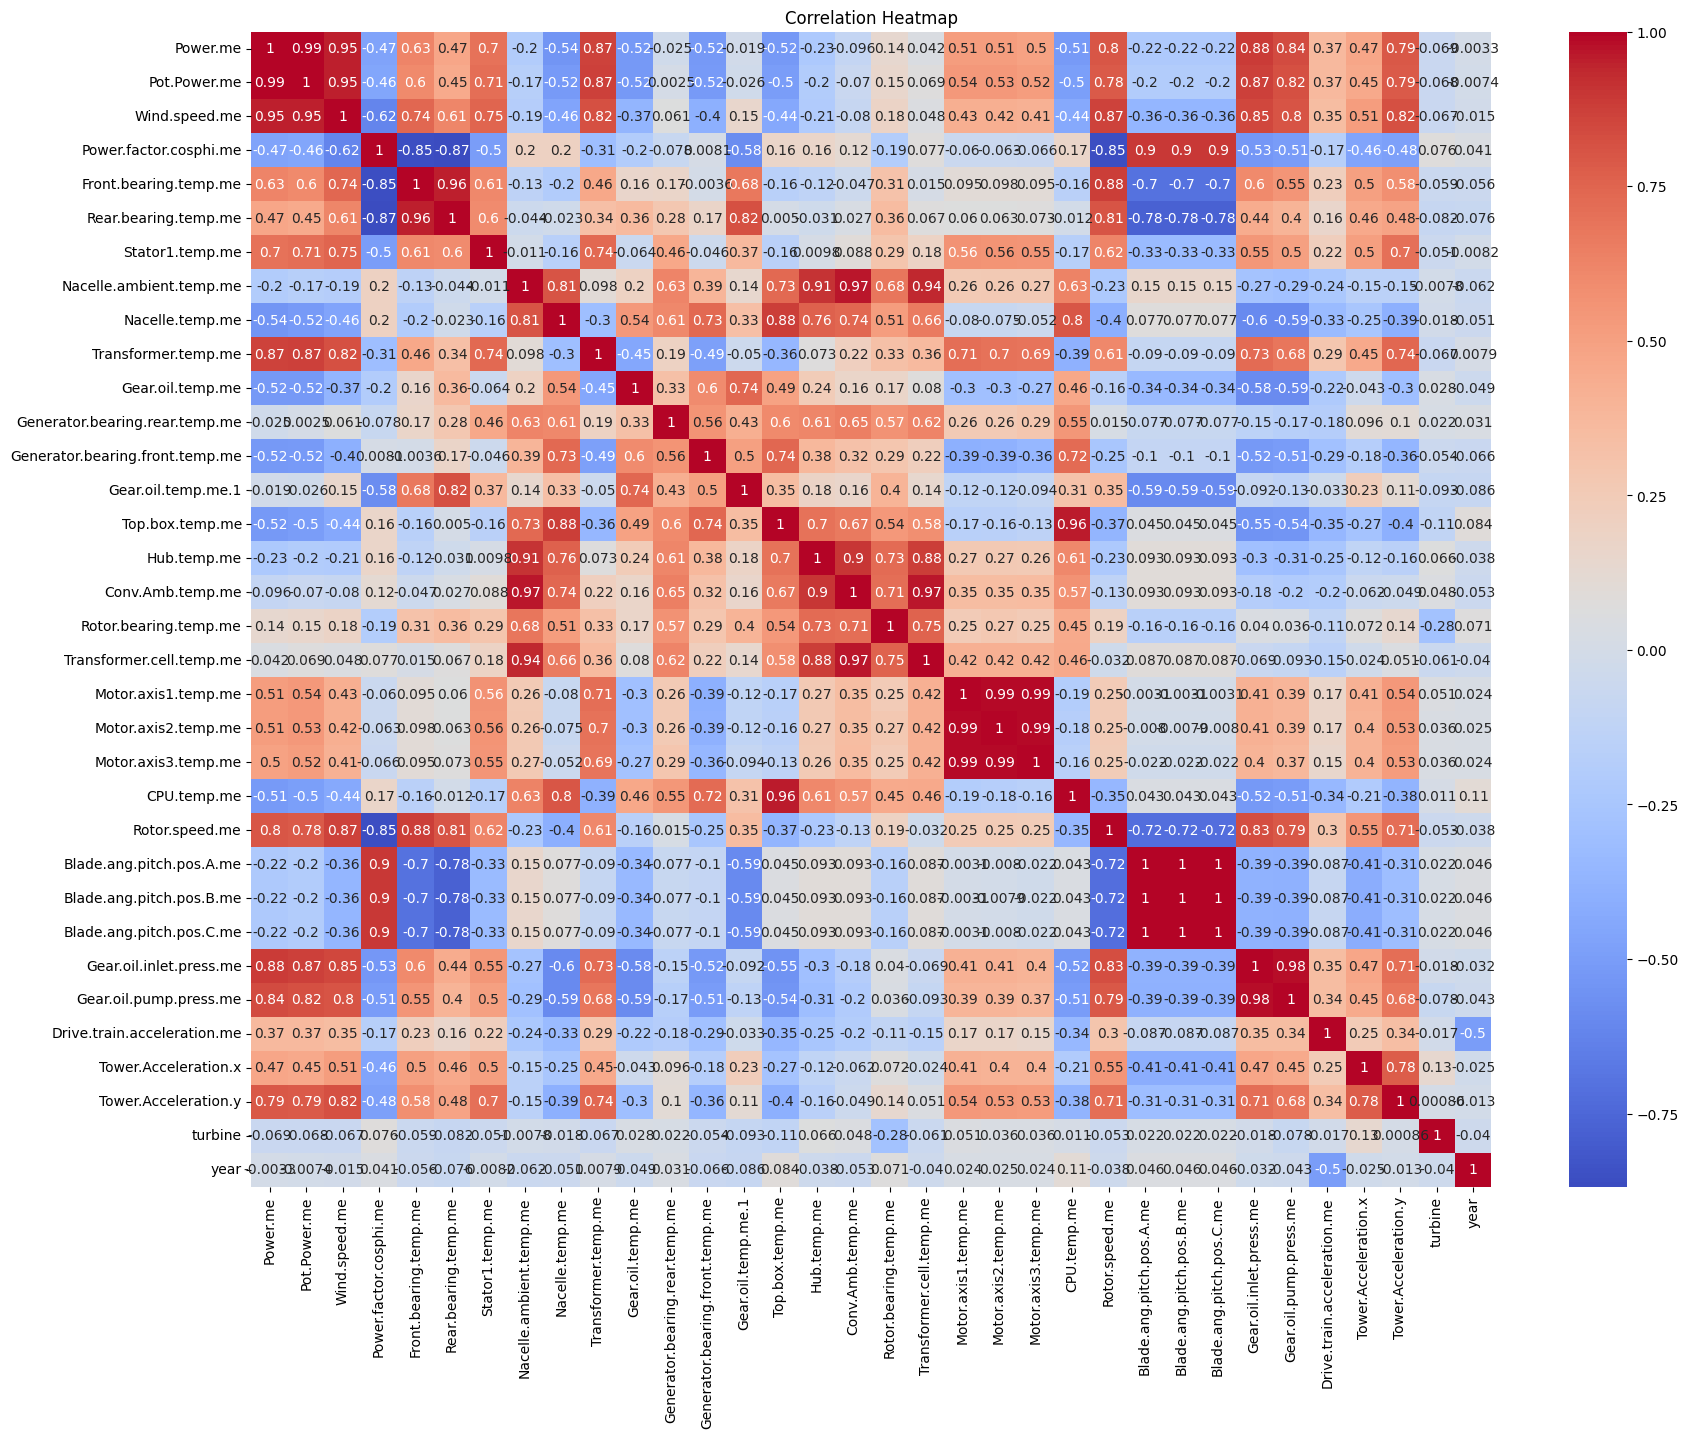

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_sub.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Variables to plot against Power.me
# training_var = [
#     'Wind.speed.me',
#     'Nacelle.temp.me',
#     'CPU.temp.me',
#     'Drive.train.acceleration.me',
#     'Tower.Acceleration.x',
# ]

training_var = [
 'Wind.speed.me',
 'Power.factor.cosphi.me',
 'Front.bearing.temp.me',
 'Stator1.temp.me',
 'Nacelle.ambient.temp.me',
 'Nacelle.temp.me',
 'Transformer.temp.me',
 'Gear.oil.temp.me',
 'Generator.bearing.rear.temp.me',
 'Generator.bearing.front.temp.me',
 'Motor.axis1.temp.me',
 'CPU.temp.me',
 'Rotor.speed.me',
 'Gear.oil.inlet.press.me',
 'Drive.train.acceleration.me',
 'Tower.Acceleration.x',
 'Tower.Acceleration.y',
 ]


fig, axes = plt.subplots(len(training_var), 1, figsize=(8, 5*len(training_var)))
for i, var in enumerate(training_var):
    sns.scatterplot(data=data_sub, x=var, y='Power.me', ax=axes[i], alpha=0.3, s=0.1)
    axes[i].set_title(f'Power.me vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Power.me')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Result for Chapter 6.2.1**

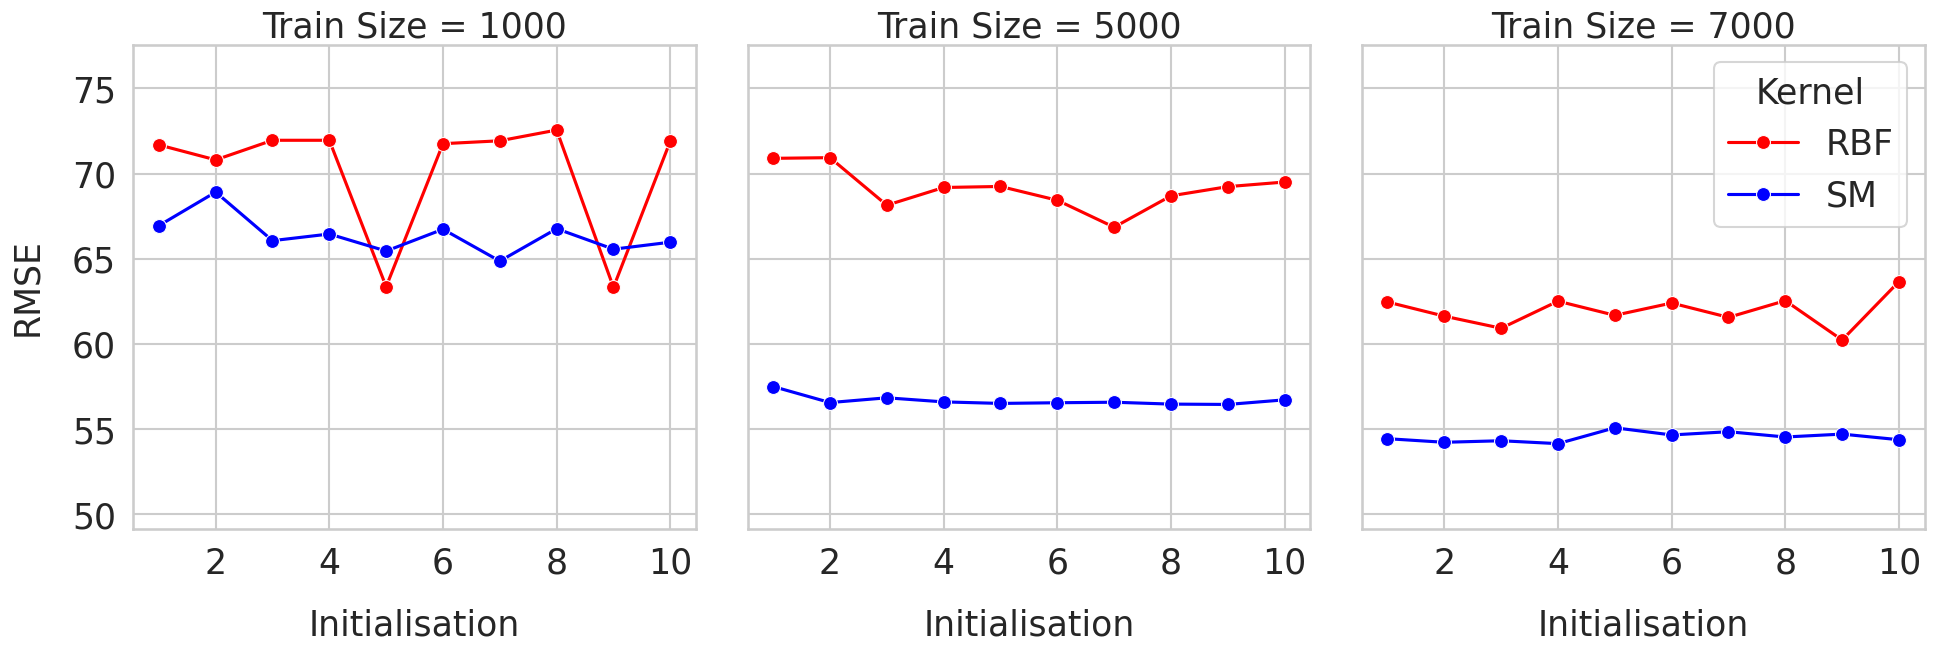

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    # N = 1,000
    {'N': 1000, 'Init': 1, 'RBF': 71.68, 'SM': 66.94},
    {'N': 1000, 'Init': 2, 'RBF': 70.8, 'SM': 68.91},
    {'N': 1000, 'Init': 3, 'RBF': 71.95, 'SM': 66.06},
    {'N': 1000, 'Init': 4, 'RBF': 71.95, 'SM': 66.45},
    {'N': 1000, 'Init': 5, 'RBF': 63.36, 'SM': 65.45},
    {'N': 1000, 'Init': 6, 'RBF': 71.75, 'SM': 66.73},
    {'N': 1000, 'Init': 7, 'RBF': 71.92, 'SM': 64.86},
    {'N': 1000, 'Init': 8, 'RBF': 72.55, 'SM': 66.76},
    {'N': 1000, 'Init': 9, 'RBF': 63.32, 'SM': 65.56},
    {'N': 1000, 'Init': 10, 'RBF': 71.9, 'SM': 65.97},
    # N = 5,000
    {'N': 5000, 'Init': 1, 'RBF': 70.89, 'SM': 57.5},
    {'N': 5000, 'Init': 2, 'RBF': 70.93, 'SM': 56.56},
    {'N': 5000, 'Init': 3, 'RBF': 68.14, 'SM': 56.84},
    {'N': 5000, 'Init': 4, 'RBF': 69.18, 'SM': 56.6},
    {'N': 5000, 'Init': 5, 'RBF': 69.24, 'SM': 56.51},
    {'N': 5000, 'Init': 6, 'RBF': 68.43, 'SM': 56.55},
    {'N': 5000, 'Init': 7, 'RBF': 66.85, 'SM': 56.58},
    {'N': 5000, 'Init': 8, 'RBF': 68.69, 'SM': 56.47},
    {'N': 5000, 'Init': 9, 'RBF': 69.23, 'SM': 56.45},
    {'N': 5000, 'Init': 10, 'RBF': 69.5, 'SM': 56.72},
    # N = 7,000
    {'N': 7000, 'Init': 1, 'RBF': 62.46, 'SM': 54.44},
    {'N': 7000, 'Init': 2, 'RBF': 61.63, 'SM': 54.23},
    {'N': 7000, 'Init': 3, 'RBF': 60.92, 'SM': 54.32},
    {'N': 7000, 'Init': 4, 'RBF': 62.51, 'SM': 54.15},
    {'N': 7000, 'Init': 5, 'RBF': 61.68, 'SM': 55.08},
    {'N': 7000, 'Init': 6, 'RBF': 62.4, 'SM': 54.66},
    {'N': 7000, 'Init': 7, 'RBF': 61.56, 'SM': 54.85},
    {'N': 7000, 'Init': 8, 'RBF': 62.54, 'SM': 54.54},
    {'N': 7000, 'Init': 9, 'RBF': 60.23, 'SM': 54.71},
    {'N': 7000, 'Init': 10, 'RBF': 63.66, 'SM': 54.38},
]

df = pd.DataFrame(data)

df_long = pd.melt(df, id_vars=['N', 'Init'], var_name='Kernel', value_name='RMSE')

kernel_colors = {"RBF": "red", "SM": "blue"}

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for ax, n_value in zip(axes, df['N'].unique()):
    sns.lineplot(
        data=df_long[df_long['N'] == n_value],
        x='Init',
        y='RMSE',
        hue='Kernel',
        palette=kernel_colors,
        marker='o',
        ax=ax, markersize=10
    )
    ax.set_title(f'Train Size = {n_value}', fontsize=25)
    ax.set_xlabel('Initialisation', fontsize=25, labelpad=20)
    ax.set_ylabel('RMSE', fontsize=25, labelpad=20)
    ax.set_ylim(df_long['RMSE'].min() - 5, df_long['RMSE'].max() + 5)  # Slightly wider ylim for better visuals
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.grid(True)

plt.tight_layout()

for ax in axes[:-1]:
    ax.get_legend().remove()

axes[-1].legend(title='Kernel', fontsize=25, title_fontsize=25)

plt.show()


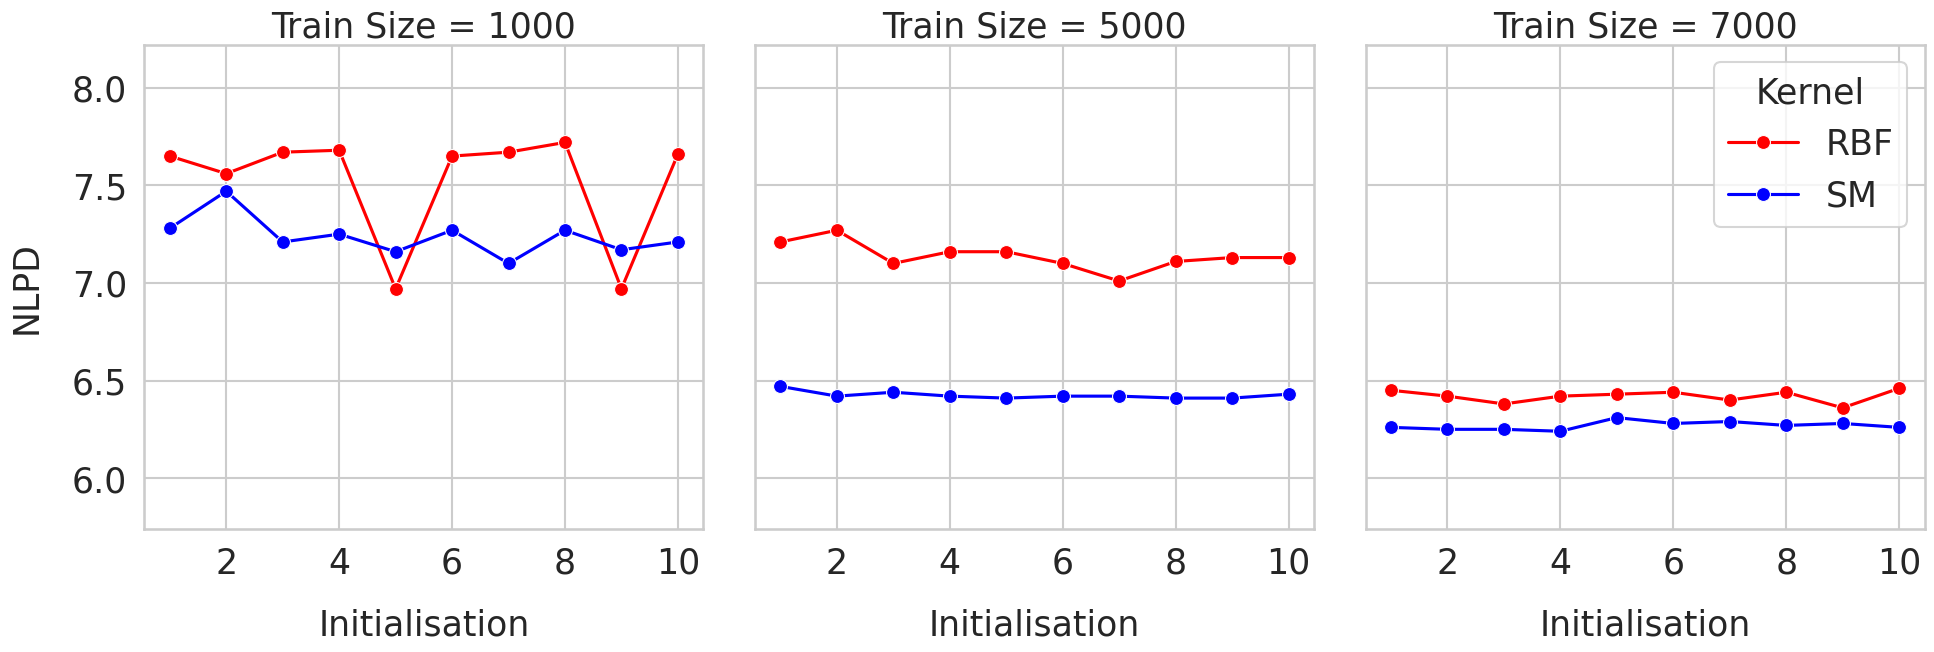

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    # N = 1,000
    {'N': 1000, 'Init': 1, 'RBF': 7.65, 'SM': 7.28},
    {'N': 1000, 'Init': 2, 'RBF': 7.56, 'SM': 7.47},
    {'N': 1000, 'Init': 3, 'RBF': 7.67, 'SM': 7.21},
    {'N': 1000, 'Init': 4, 'RBF': 7.68, 'SM': 7.25},
    {'N': 1000, 'Init': 5, 'RBF': 6.97, 'SM': 7.16},
    {'N': 1000, 'Init': 6, 'RBF': 7.65, 'SM': 7.27},
    {'N': 1000, 'Init': 7, 'RBF': 7.67, 'SM': 7.1},
    {'N': 1000, 'Init': 8, 'RBF': 7.72, 'SM': 7.27},
    {'N': 1000, 'Init': 9, 'RBF': 6.97, 'SM': 7.17},
    {'N': 1000, 'Init': 10, 'RBF': 7.66, 'SM': 7.21},
    # N = 5,000
    {'N': 5000, 'Init': 1, 'RBF': 7.21, 'SM': 6.47},
    {'N': 5000, 'Init': 2, 'RBF': 7.27, 'SM': 6.42},
    {'N': 5000, 'Init': 3, 'RBF': 7.1, 'SM': 6.44},
    {'N': 5000, 'Init': 4, 'RBF': 7.16, 'SM': 6.42},
    {'N': 5000, 'Init': 5, 'RBF': 7.16, 'SM': 6.41},
    {'N': 5000, 'Init': 6, 'RBF': 7.1, 'SM': 6.42},
    {'N': 5000, 'Init': 7, 'RBF': 7.01, 'SM': 6.42},
    {'N': 5000, 'Init': 8, 'RBF': 7.11, 'SM': 6.41},
    {'N': 5000, 'Init': 9, 'RBF': 7.13, 'SM': 6.41},
    {'N': 5000, 'Init': 10, 'RBF': 7.13, 'SM': 6.43},
    # N = 7,000
    {'N': 7000, 'Init': 1, 'RBF': 6.45, 'SM': 6.26},
    {'N': 7000, 'Init': 2, 'RBF': 6.42, 'SM': 6.25},
    {'N': 7000, 'Init': 3, 'RBF': 6.38, 'SM': 6.25},
    {'N': 7000, 'Init': 4, 'RBF': 6.42, 'SM': 6.24},
    {'N': 7000, 'Init': 5, 'RBF': 6.43, 'SM': 6.31},
    {'N': 7000, 'Init': 6, 'RBF': 6.44, 'SM': 6.28},
    {'N': 7000, 'Init': 7, 'RBF': 6.4, 'SM': 6.29},
    {'N': 7000, 'Init': 8, 'RBF': 6.44, 'SM': 6.27},
    {'N': 7000, 'Init': 9, 'RBF': 6.36, 'SM': 6.28},
    {'N': 7000, 'Init': 10, 'RBF': 6.46, 'SM': 6.26},
]

df = pd.DataFrame(data)

df_long = pd.melt(df, id_vars=['N', 'Init'], var_name='Kernel', value_name='NLPD')

kernel_colors = {"RBF": "red", "SM": "blue"}

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for ax, n_value in zip(axes, df['N'].unique()):
    sns.lineplot(
        data=df_long[df_long['N'] == n_value],
        x='Init',
        y='NLPD',
        hue='Kernel',
        palette=kernel_colors,
        marker='o',
        ax=ax, markersize = 10
    )
    ax.set_title(f'Train Size = {n_value}', fontsize=25)
    ax.set_xlabel('Initialisation', fontsize=25, labelpad=20)
    ax.set_ylabel('NLPD', fontsize=25, labelpad=20)
    ax.set_ylim(df_long['NLPD'].min() - 0.5, df_long['NLPD'].max() + 0.5)  # Adjust y-axis limits for better visualization
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.grid(True)

plt.tight_layout()

for ax in axes[:-1]:
    ax.get_legend().remove()

axes[-1].legend(title='Kernel', fontsize=25, title_fontsize=25)

plt.show()

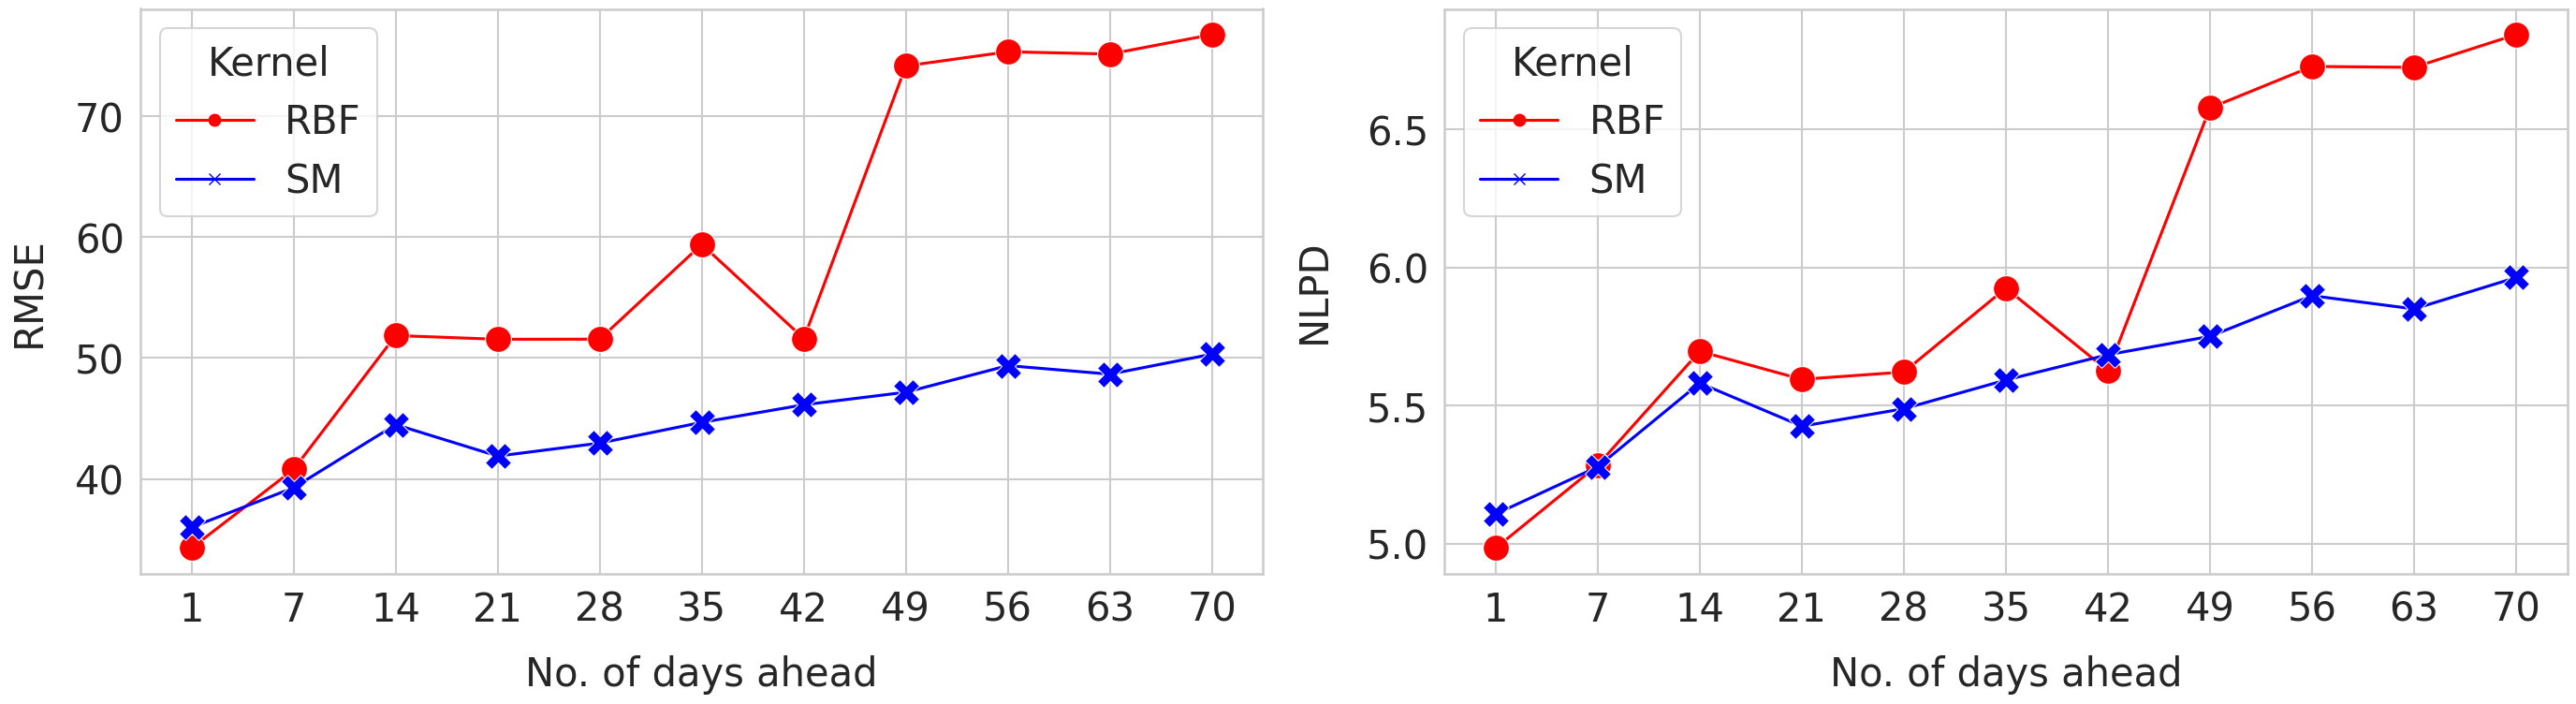

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

data = {
    "Time Step": ["1", "7", "14", "21", "28", "35", "42", "49", "56", "63", "70"],
    "RBF_RMSE": [34.27975191, 40.78841724, 51.86255012, 51.5528778, 51.56140241, 59.40592741, 51.61318664, 74.16669166, 75.33982591, 75.14879913, 76.76114997],
    "SM_RMSE": [35.99416926, 39.27244411, 44.49418441, 41.88831563, 42.96337381, 44.67916376, 46.13445588, 47.17310439, 49.37442324, 48.666365, 50.32118574],
    "RBF_NLPD": [4.984499698, 5.28483093, 5.696817617, 5.595330986, 5.621767333, 5.925333512, 5.626416696, 6.577364772, 6.727918123, 6.72467609, 6.843343577],
    "SM_NLPD": [5.107589151, 5.278766169, 5.581862458, 5.425609055, 5.488920072, 5.592803698, 5.684501804, 5.750797116, 5.898122274, 5.850185358, 5.963816013]
}

df = pd.DataFrame(data)
df['Time Step'] = pd.Categorical(df['Time Step'], categories=["1", "7", "14", "21", "28", "35", "42", "49", "56", "63", "70"], ordered=True)

fig, axs = plt.subplots(1, 2, figsize=(28, 8))  # 1 row, 2 columns
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.25)

handles = [Line2D([], [], color='red', marker='o', linestyle='-', label='RBF'),
           Line2D([], [], color='blue', marker='x', linestyle='-', label='SM')]

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['RBF_RMSE', 'SM_RMSE']), ax=axs[0], markersize = 20)
axs[0].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles, title='Kernel', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['RBF_NLPD', 'SM_NLPD']), ax=axs[1], markersize = 20)
axs[1].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles, title='Kernel', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)

plt.tight_layout()
plt.show()

# **GSM comparison analysis**

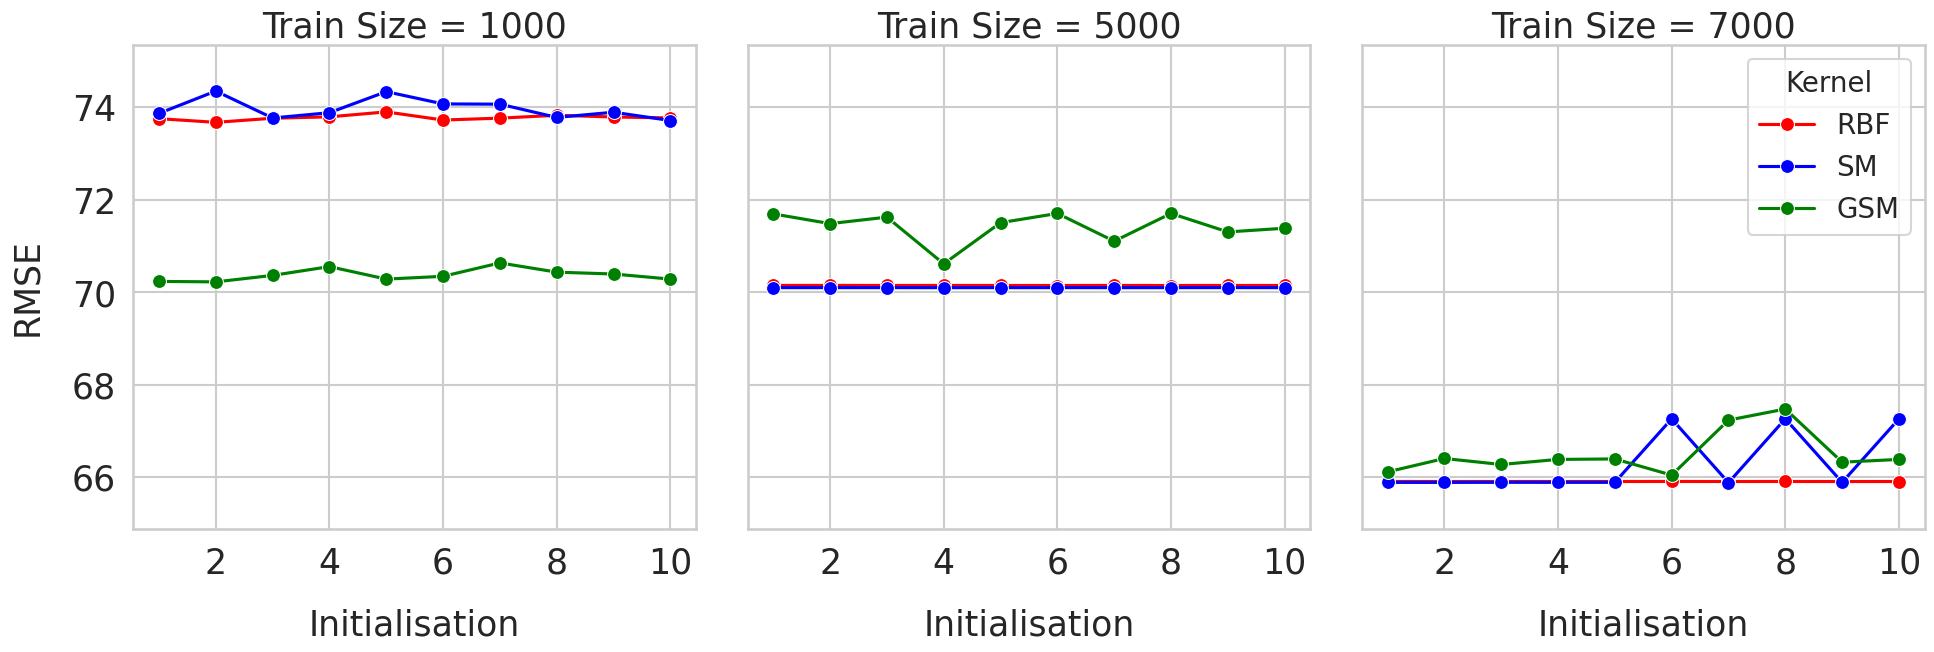

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    # N = 1,000
    {'N': 1000, 'Init': 1, 'RBF': 73.74987632, 'SM': 73.86321842, 'GSM': 70.23},
    {'N': 1000, 'Init': 2, 'RBF': 73.67037614, 'SM': 74.34686202, 'GSM': 70.22},
    {'N': 1000, 'Init': 3, 'RBF': 73.75921162, 'SM': 73.76437111, 'GSM': 70.36},
    {'N': 1000, 'Init': 4, 'RBF': 73.78947289, 'SM': 73.87920199, 'GSM': 70.55},
    {'N': 1000, 'Init': 5, 'RBF': 73.89636382, 'SM': 74.33405588, 'GSM': 70.28},
    {'N': 1000, 'Init': 6, 'RBF': 73.72024171, 'SM': 74.068854, 'GSM': 70.34},
    {'N': 1000, 'Init': 7, 'RBF': 73.76131061, 'SM': 74.06346424, 'GSM': 70.63},
    {'N': 1000, 'Init': 8, 'RBF': 73.82307329, 'SM': 73.77722912, 'GSM': 70.43},
    {'N': 1000, 'Init': 9, 'RBF': 73.78647235, 'SM': 73.88910629, 'GSM': 70.39},
    {'N': 1000, 'Init': 10, 'RBF': 73.76566809, 'SM': 73.7101924, 'GSM': 70.28},
    # N = 5,000
    {'N': 5000, 'Init': 1, 'RBF': 70.14257505, 'SM': 70.09508732, 'GSM': 71.69},
    {'N': 5000, 'Init': 2, 'RBF': 70.14320052, 'SM': 70.0951203, 'GSM': 71.48},
    {'N': 5000, 'Init': 3, 'RBF': 70.14192617, 'SM': 70.09514658, 'GSM': 71.62},
    {'N': 5000, 'Init': 4, 'RBF': 70.14257901, 'SM': 70.09463678, 'GSM': 70.61},
    {'N': 5000, 'Init': 5, 'RBF': 70.14193569, 'SM': 70.09475119, 'GSM': 71.5},
    {'N': 5000, 'Init': 6, 'RBF': 70.14133667, 'SM': 70.09526589, 'GSM': 71.7},
    {'N': 5000, 'Init': 7, 'RBF': 70.14277706, 'SM': 70.09491687, 'GSM': 71.1},
    {'N': 5000, 'Init': 8, 'RBF': 70.14132954, 'SM': 70.09485892, 'GSM': 71.7},
    {'N': 5000, 'Init': 9, 'RBF': 70.14275337, 'SM': 70.09603656, 'GSM': 71.3},
    {'N': 5000, 'Init': 10, 'RBF': 70.14171896, 'SM': 70.094929, 'GSM': 71.38},
    # N = 7,000
    {'N': 7000, 'Init': 1, 'RBF': 65.90307185, 'SM': 65.88299078, 'GSM': 66.11},
    {'N': 7000, 'Init': 2, 'RBF': 65.90149172, 'SM': 65.88285675, 'GSM': 66.4},
    {'N': 7000, 'Init': 3, 'RBF': 65.90238169, 'SM': 65.88434237, 'GSM': 66.27},
    {'N': 7000, 'Init': 4, 'RBF': 65.90176381, 'SM': 65.88412649, 'GSM': 66.38},
    {'N': 7000, 'Init': 5, 'RBF': 65.90209657, 'SM': 65.88389507, 'GSM': 66.39},
    {'N': 7000, 'Init': 6, 'RBF': 65.90252006, 'SM': 67.25759319, 'GSM': 66.04},
    {'N': 7000, 'Init': 7, 'RBF': 65.90212975, 'SM': 65.87780588, 'GSM': 67.23},
    {'N': 7000, 'Init': 8, 'RBF': 65.90258287, 'SM': 67.25795705, 'GSM': 67.47},
    {'N': 7000, 'Init': 9, 'RBF': 65.90145872, 'SM': 65.88406139, 'GSM': 66.32},
    {'N': 7000, 'Init': 10, 'RBF': 65.9017671, 'SM': 67.25781971, 'GSM': 66.38},
]

df = pd.DataFrame(data)

df_long = pd.melt(df, id_vars=['N', 'Init'], var_name='Kernel', value_name='RMSE')

kernel_colors = {"RBF": "red", "SM": "blue", "GSM": "green"}

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for ax, n_value in zip(axes, df['N'].unique()):
    sns.lineplot(
        data=df_long[df_long['N'] == n_value],
        x='Init',
        y='RMSE',
        hue='Kernel',
        palette=kernel_colors,
        marker='o',
        ax=ax, markersize=10
    )
    ax.set_title(f'Train Size = {n_value}', fontsize=25)
    ax.set_xlabel('Initialisation', fontsize=25, labelpad=20)
    ax.set_ylabel('RMSE', fontsize=25, labelpad=20)
    ax.set_ylim(df_long['RMSE'].min() - 1, df_long['RMSE'].max() + 1)  # Slightly wider ylim for better visuals
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.grid(True)

plt.tight_layout()

for ax in axes[:-1]:
    ax.get_legend().remove()

axes[-1].legend(title='Kernel', fontsize=20, title_fontsize=20)

plt.show()


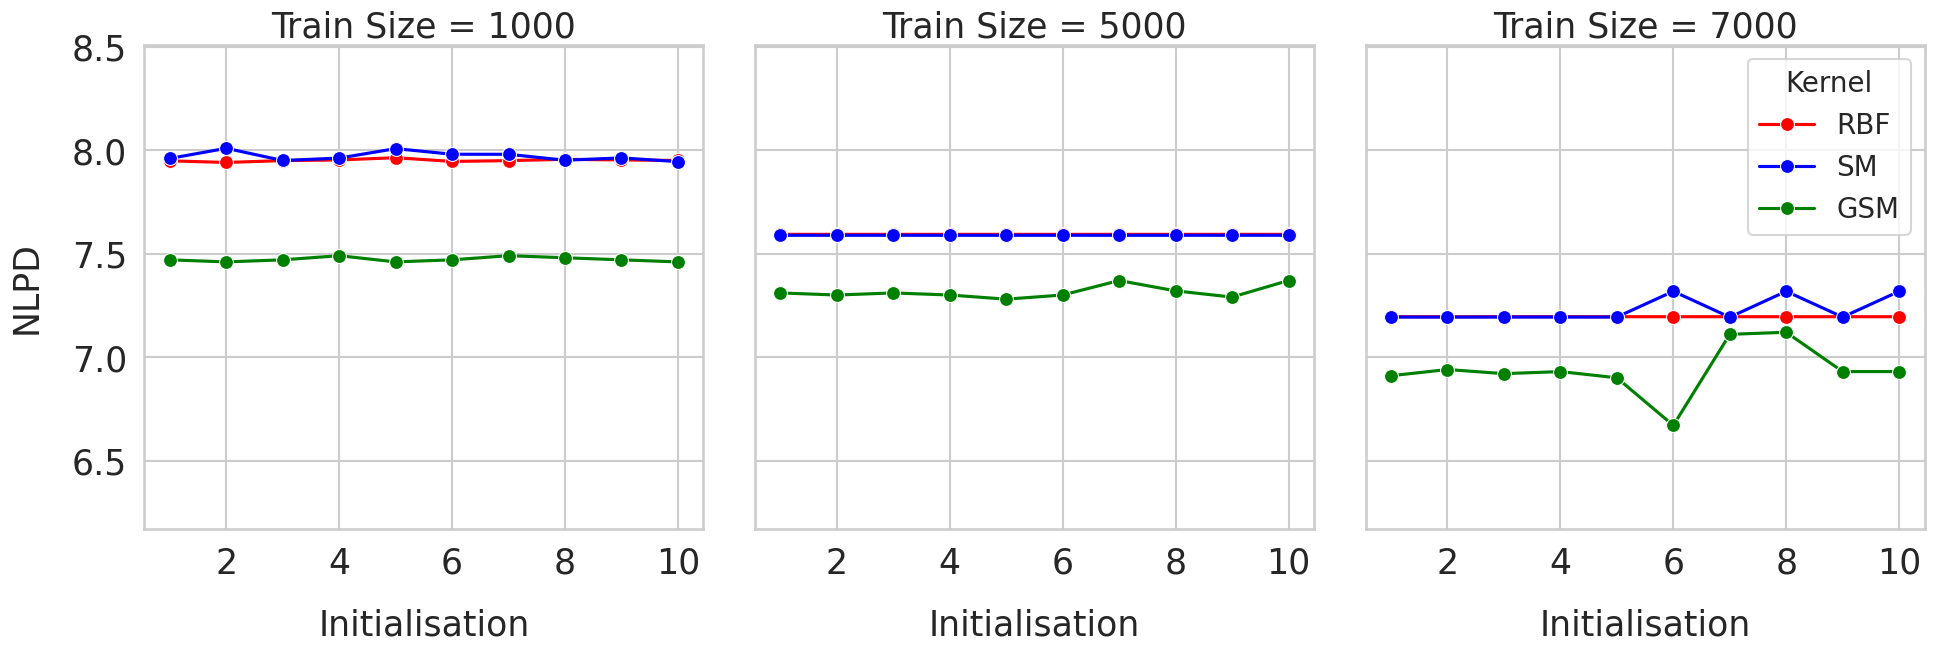

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    {'N': 1000, 'Init': 1, 'RBF': 7.948403817, 'SM': 7.95996563, 'GSM': 7.47},
    {'N': 1000, 'Init': 2, 'RBF': 7.940500308, 'SM': 8.008937233, 'GSM': 7.46},
    {'N': 1000, 'Init': 3, 'RBF': 7.94952677, 'SM': 7.95007789, 'GSM': 7.47},
    {'N': 1000, 'Init': 4, 'RBF': 7.952753912, 'SM': 7.961722613, 'GSM': 7.49},
    {'N': 1000, 'Init': 5, 'RBF': 7.963401584, 'SM': 8.007357683, 'GSM': 7.46},
    {'N': 1000, 'Init': 6, 'RBF': 7.945522848, 'SM': 7.980255126, 'GSM': 7.47},
    {'N': 1000, 'Init': 7, 'RBF': 7.949418013, 'SM': 7.979972825, 'GSM': 7.49},
    {'N': 1000, 'Init': 8, 'RBF': 7.955715049, 'SM': 7.951360989, 'GSM': 7.48},
    {'N': 1000, 'Init': 9, 'RBF': 7.952732411, 'SM': 7.962665562, 'GSM': 7.47},
    {'N': 1000, 'Init': 10, 'RBF': 7.950165021, 'SM': 7.944560205, 'GSM': 7.46},
    {'N': 5000, 'Init': 1, 'RBF': 7.593116962, 'SM': 7.5885605, 'GSM': 7.31},
    {'N': 5000, 'Init': 2, 'RBF': 7.593177433, 'SM': 7.588563775, 'GSM': 7.3},
    {'N': 5000, 'Init': 3, 'RBF': 7.593054547, 'SM': 7.588566198, 'GSM': 7.31},
    {'N': 5000, 'Init': 4, 'RBF': 7.593117343, 'SM': 7.588516824, 'GSM': 7.3},
    {'N': 5000, 'Init': 5, 'RBF': 7.593055585, 'SM': 7.588528052, 'GSM': 7.28},
    {'N': 5000, 'Init': 6, 'RBF': 7.592997664, 'SM': 7.58857764, 'GSM': 7.3},
    {'N': 5000, 'Init': 7, 'RBF': 7.593136613, 'SM': 7.58854366, 'GSM': 7.37},
    {'N': 5000, 'Init': 8, 'RBF': 7.592996886, 'SM': 7.588538442, 'GSM': 7.32},
    {'N': 5000, 'Init': 9, 'RBF': 7.593134135, 'SM': 7.588650923, 'GSM': 7.29},
    {'N': 5000, 'Init': 10, 'RBF': 7.593034364, 'SM': 7.588545149, 'GSM': 7.37},
    {'N': 7000, 'Init': 1, 'RBF': 7.195213404, 'SM': 7.193405864, 'GSM': 6.91},
    {'N': 7000, 'Init': 2, 'RBF': 7.195070365, 'SM': 7.193393587, 'GSM': 6.94},
    {'N': 7000, 'Init': 3, 'RBF': 7.195150708, 'SM': 7.193528044, 'GSM': 6.92},
    {'N': 7000, 'Init': 4, 'RBF': 7.195095054, 'SM': 7.193508545, 'GSM': 6.93},
    {'N': 7000, 'Init': 5, 'RBF': 7.195124758, 'SM': 7.193487805, 'GSM': 6.9},
    {'N': 7000, 'Init': 6, 'RBF': 7.195163624, 'SM': 7.317878397, 'GSM': 6.67},
    {'N': 7000, 'Init': 7, 'RBF': 7.195127624, 'SM': 7.192942521, 'GSM': 7.11},
    {'N': 7000, 'Init': 8, 'RBF': 7.195168872, 'SM': 7.317911973, 'GSM': 7.12},
    {'N': 7000, 'Init': 9, 'RBF': 7.195067157, 'SM': 7.193502702, 'GSM': 6.93},
    {'N': 7000, 'Init': 10, 'RBF': 7.195095024, 'SM': 7.317899308, 'GSM': 6.93},
]

df = pd.DataFrame(data)

df_long = pd.melt(df, id_vars=['N', 'Init'], var_name='Kernel', value_name='NLPD')

kernel_colors = {"RBF": "red", "SM": "blue", "GSM": "green"}

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for ax, n_value in zip(axes, df['N'].unique()):
    sns.lineplot(
        data=df_long[df_long['N'] == n_value],
        x='Init',
        y='NLPD',
        hue='Kernel',
        palette=kernel_colors,
        marker='o',
        ax=ax,markersize=10
    )
    ax.set_title(f'Train Size = {n_value}', fontsize=25)
    ax.set_xlabel('Initialisation', fontsize=25, labelpad=20)
    ax.set_ylabel('NLPD', fontsize=25, labelpad=20)
    ax.set_ylim(df_long['NLPD'].min() - 0.5, df_long['NLPD'].max() + 0.5)  # Adjust y-axis limits for better visualization
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.grid(True)

plt.tight_layout()

for ax in axes[:-1]:
    ax.get_legend().remove()

axes[-1].legend(title='Kernel', fontsize=20, title_fontsize=20)

plt.show()

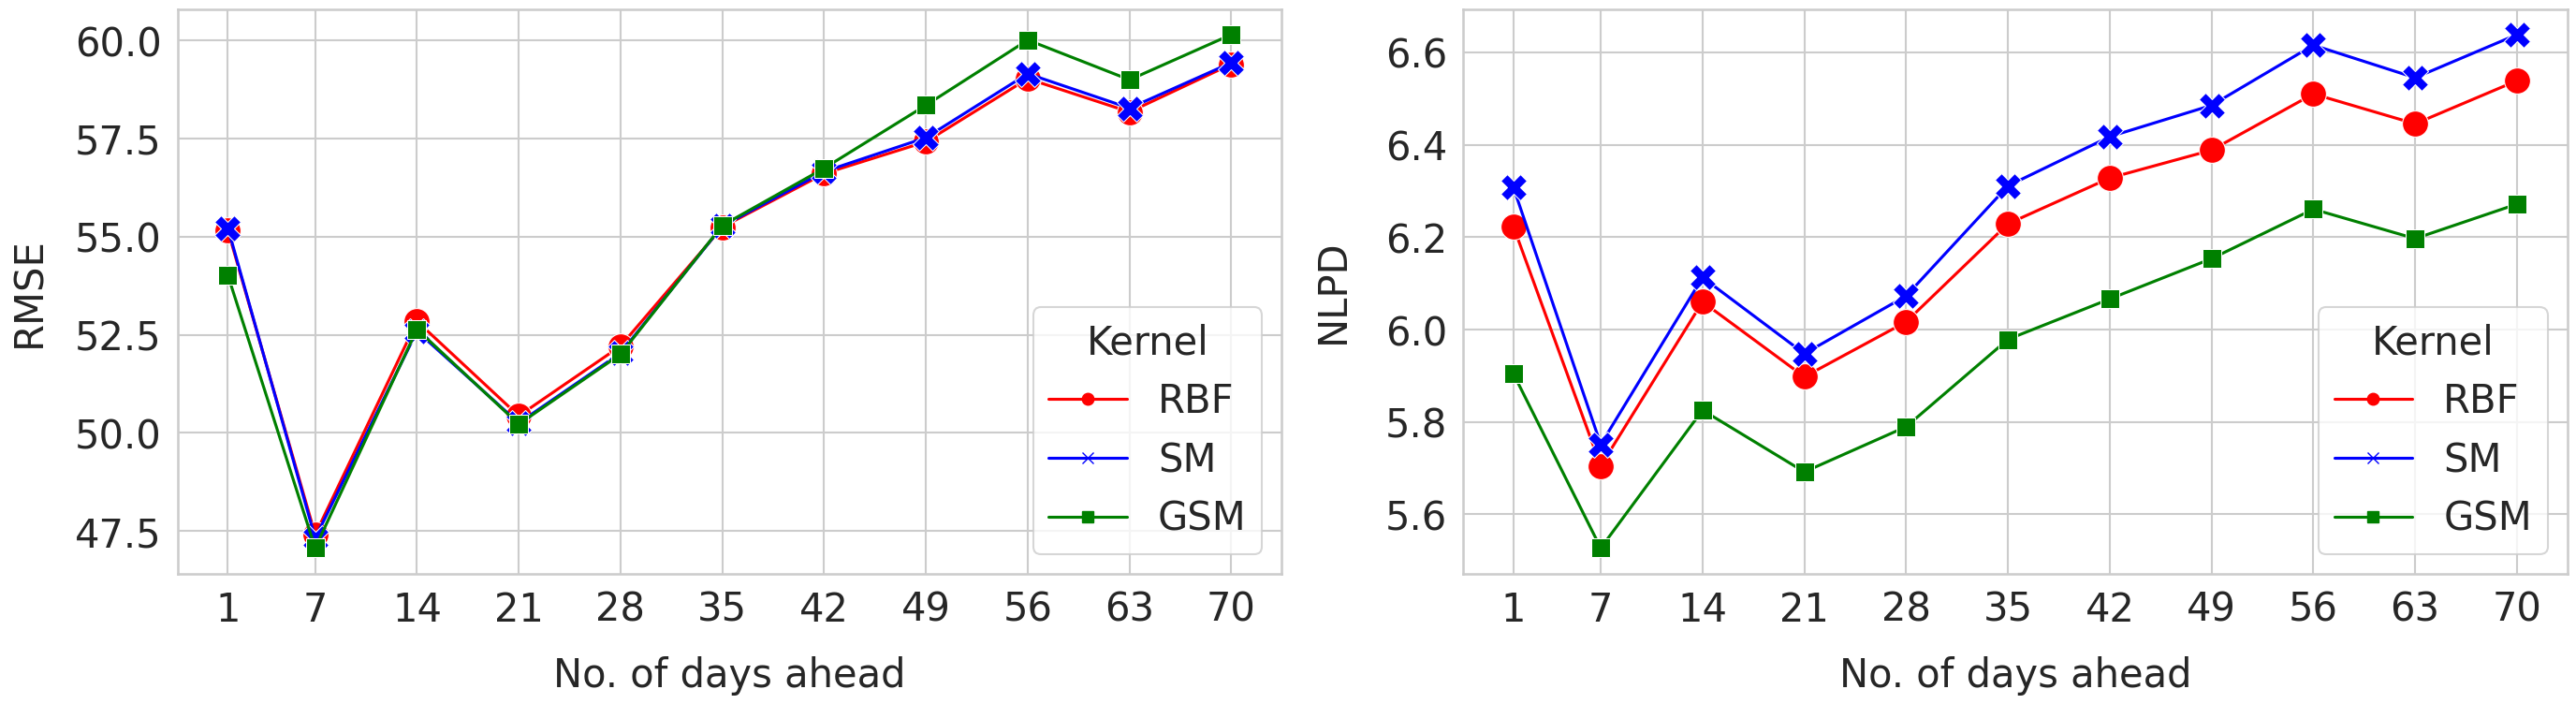

In [ ]:
data_updated = {
    "Time Step": [1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
    "RBF_RMSE": [55.15821713, 47.4103743, 52.84713449, 50.4352019, 52.21459975, 55.24577266, 56.60666506, 57.41794027, 59.02433338, 58.17609812, 59.39429822],
    "SM_RMSE": [55.2211747, 47.32062992, 52.59257503, 50.25507552, 52.03575552, 55.27051946, 56.65853192, 57.52314, 59.15113942, 58.27429538, 59.43165213],
    "GSM_RMSE": [54.01358113, 47.06853877, 52.64360575, 50.22365368, 52.00597857, 55.28786825, 56.7426552, 58.34870898, 60.00982946, 58.99539573, 60.14799666],
    "RBF_NLPD": [6.222605059, 5.704869511, 6.059974898, 5.897686145, 6.016681005, 6.228887143, 6.328051196, 6.388308909, 6.510167817, 6.445403207, 6.538710334],
    "SM_NLPD": [6.307266575, 5.751263413, 6.112764501, 5.947773096, 6.07278102, 6.311003806, 6.417625947, 6.485379419, 6.615738961, 6.545074757, 6.638568031],
    "GSM_NLPD": [5.904016074, 5.52692348, 5.825454627, 5.691776996, 5.789616753, 5.97871278, 6.066214302, 6.153465745, 6.260531969, 6.196873105, 6.271547974]
}

df_updated = pd.DataFrame(data_updated)
df_updated['Time Step'] = pd.Categorical(df_updated['Time Step'], categories=[1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70], ordered=True)

handles_updated = [
    Line2D([], [], color='red', marker='o', linestyle='-', label='RBF'),
    Line2D([], [], color='blue', marker='x', linestyle='-', label='SM'),
    Line2D([], [], color='green', marker='s', linestyle='-', label='GSM')  # Adding GSM to legend
]


fig, axs = plt.subplots(1, 2, figsize=(28, 8))

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue", "green"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['RBF_RMSE', 'SM_RMSE', 'GSM_RMSE']), ax=axs[0], markersize=20)
axs[0].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles_updated, title='Kernel', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)
axs[0].set_xticks(df_updated['Time Step'])

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue", "green"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['RBF_NLPD', 'SM_NLPD', 'GSM_NLPD']), ax=axs[1], markersize=20)
axs[1].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles_updated, title='Kernel', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)
axs[1].set_xticks(df_updated['Time Step'])
plt.tight_layout()
plt.show()

# **Multi-Task Gaussian Processes**

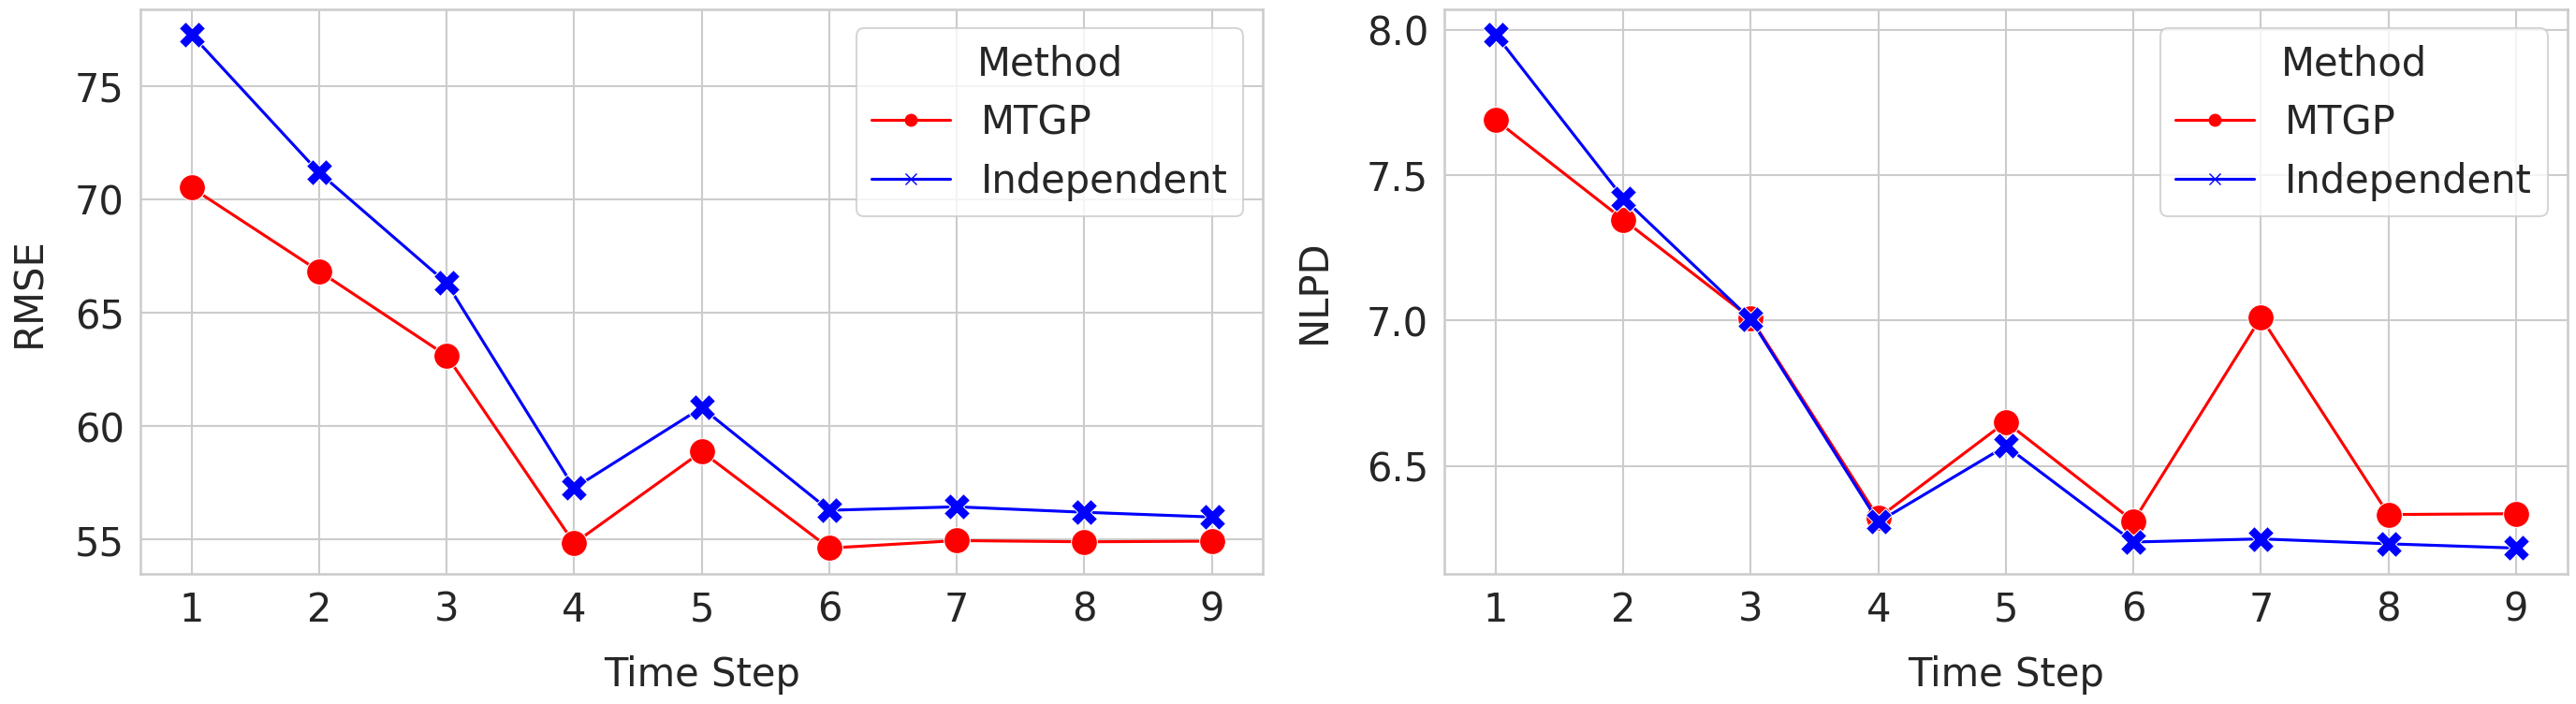

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

data = {
    "Time Step": ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "MTGP_RMSE": [70.5108372, 66.83250469, 63.10528992, 54.83833368, 58.88222784, 54.62880247, 54.95903978, 54.90569483, 54.93319789],
    "Independent_RMSE": [77.25972985, 71.1756223, 66.31077316, 57.27378695, 60.81801842, 56.29556046, 56.44709078, 56.20658806, 55.99726392],
    "MTGP_NLPD": [7.688753331, 7.346340207, 7.007204593, 6.320685597, 6.650824485, 6.30926999, 7.010046037, 6.332345863, 6.335196582],
    "Independent_NLPD": [7.982552722, 7.419866674, 7.003071716, 6.307040445, 6.567991077, 6.237887188, 6.248560653, 6.231684289, 6.217057575]
}

df = pd.DataFrame(data)
# Ensure time steps are ordered correctly
df['Time Step'] = pd.Categorical(df['Time Step'], categories=["1", "2", "3", "4", "5", "6", "7", "8", "9"], ordered=True)

fig, axs = plt.subplots(1, 2, figsize=(28, 8))  # 1 row, 2 columns
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.25)

handles = [
    Line2D([], [], color='red', marker='o', linestyle='-', label='MTGP'),
    Line2D([], [], color='blue', marker='x', linestyle='-', label='Independent')
]

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['MTGP_RMSE', 'Independent_RMSE']), ax=axs[0], markersize=20)
axs[0].set_xlabel('Time Step', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles, title='Method', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['MTGP_NLPD', 'Independent_NLPD']), ax=axs[1],markersize=20)
axs[1].set_xlabel('Time Step', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles, title='Method', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)

plt.tight_layout()
plt.show()


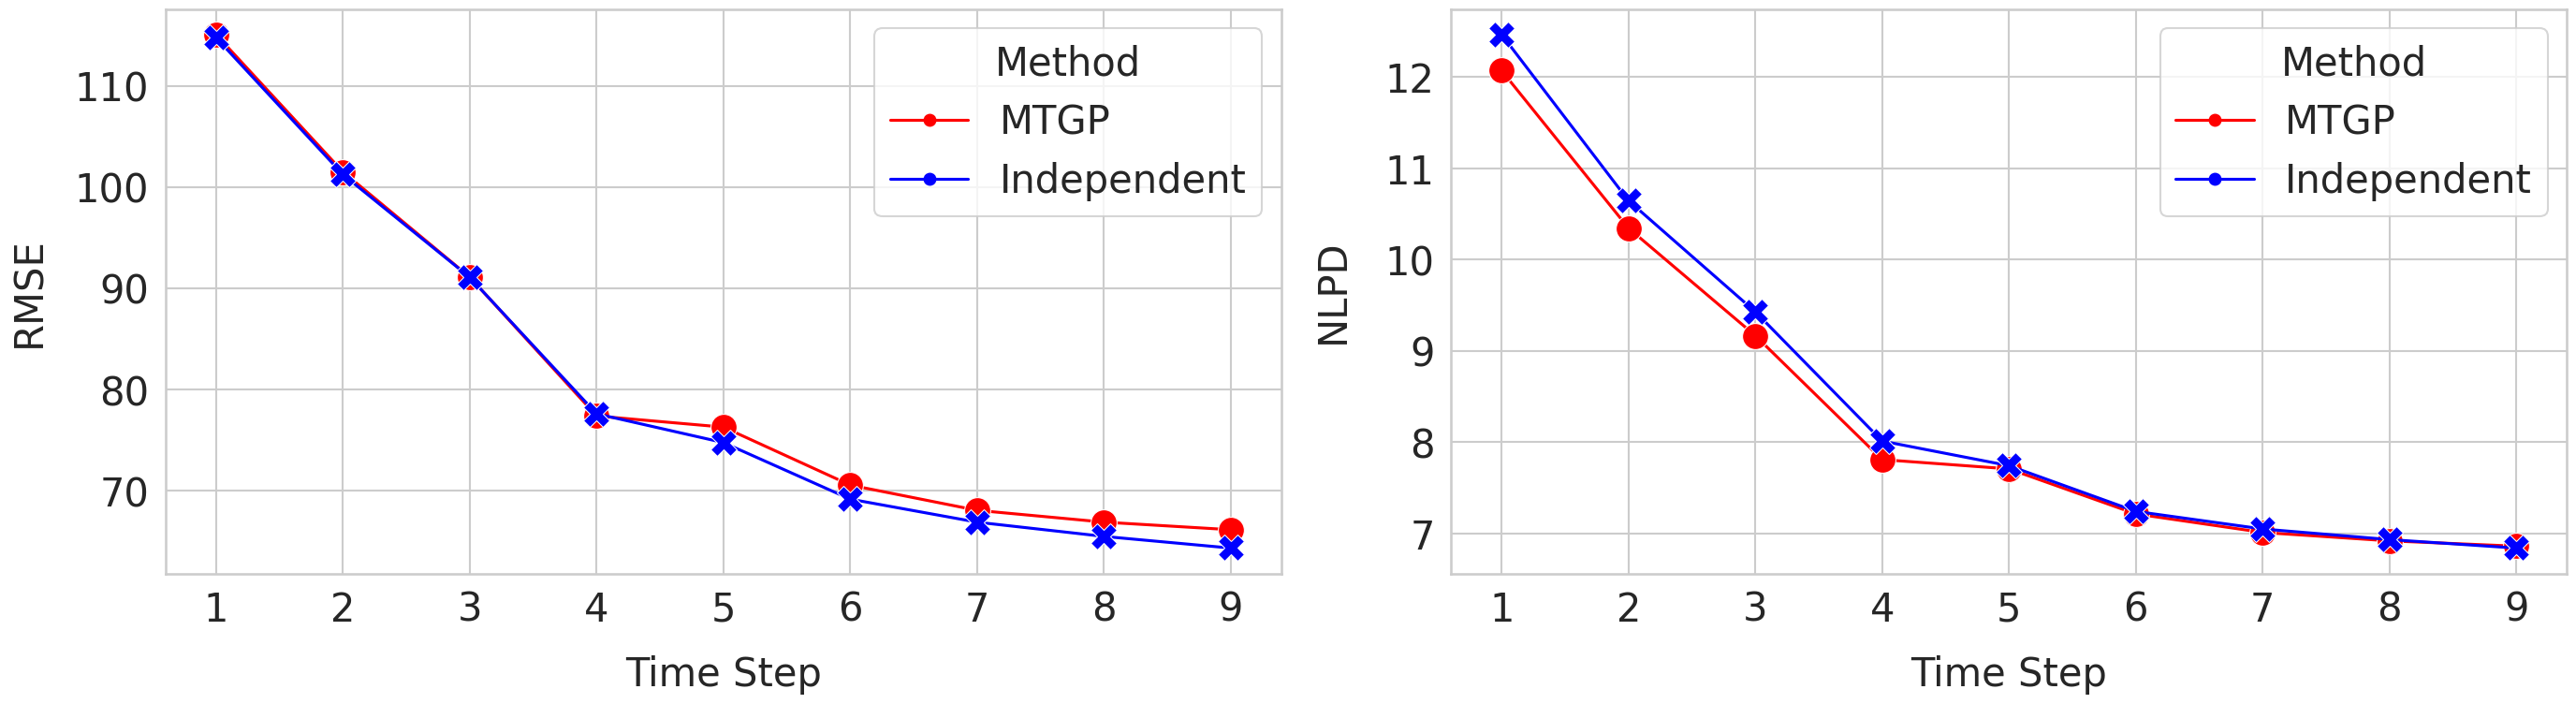

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

data = {
    "Time Step": ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "MTGP_RMSE": [115.0910607, 101.5183003, 91.10734934, 77.37660514, 76.27669273, 70.54133791, 68.04699921, 66.88047275, 66.13119657],
    "Independent_RMSE": [114.7872007, 101.2542569, 91.08648714, 77.58937602, 74.74572324, 69.15255857, 66.87544438, 65.46727983, 64.31569609],
    "MTGP_NLPD": [12.0720728, 10.34619209, 9.167425106, 7.808416775, 7.7068316, 7.212852065, 7.010046037, 6.917698304, 6.859469965],
    "Independent_NLPD": [12.46736726, 10.64700864, 9.429261347, 8.011675095, 7.74170938, 7.240609904, 7.047792874, 6.931759869, 6.838679218]
}

df = pd.DataFrame(data)
df['Time Step'] = pd.Categorical(df['Time Step'], categories=["1", "2", "3", "4", "5", "6", "7", "8", "9"], ordered=True)

fig, axs = plt.subplots(1, 2, figsize=(28, 8))  # 1 row, 2 columns
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.25)

handles = [
    Line2D([], [], color='red', marker='o', linestyle='-', label='MTGP'),
    Line2D([], [], color='blue', marker='o', linestyle='-', label='Independent')
]

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['MTGP_RMSE', 'Independent_RMSE']), ax=axs[0], markersize=20)
axs[0].set_xlabel('Time Step', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles, title='Method', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df, id_vars='Time Step', value_vars=['MTGP_NLPD', 'Independent_NLPD']), ax=axs[1], markersize=20)
axs[1].set_xlabel('Time Step', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles, title='Method', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)

plt.tight_layout()
plt.show()


# **FITC and VFE GP**

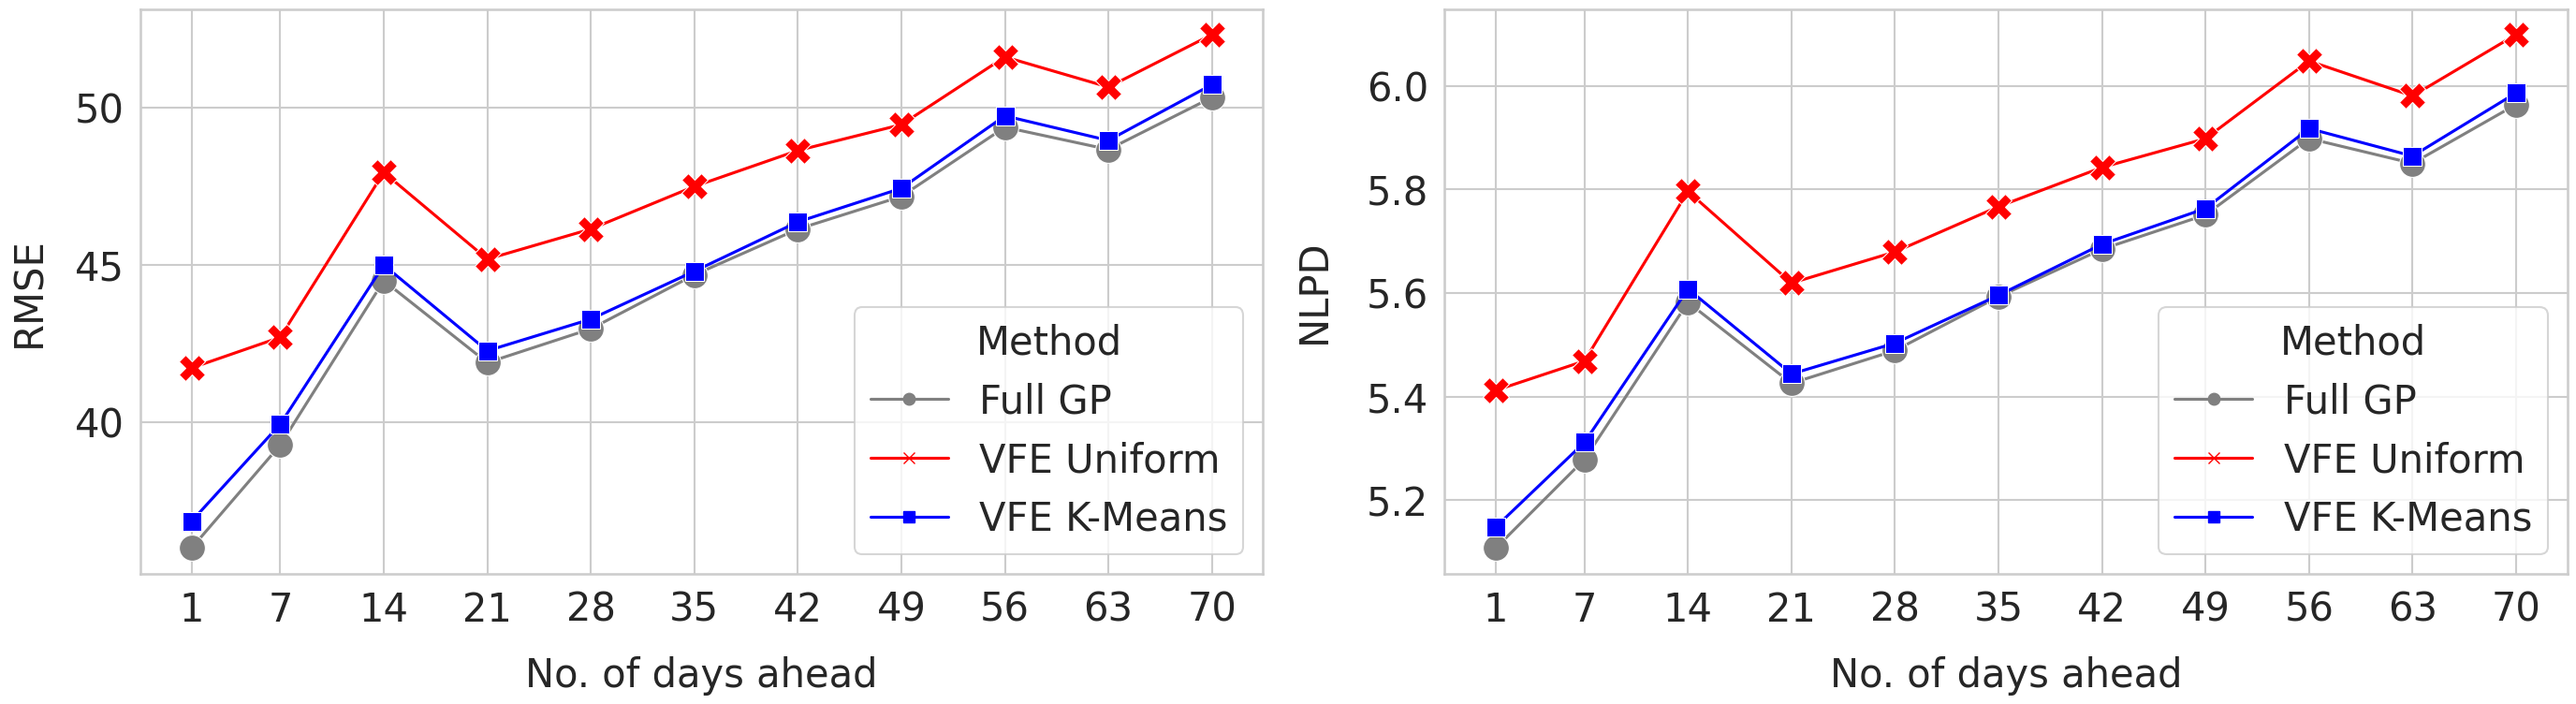

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data_updated = {
    "Time Step": [1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
    "Full_GP_RMSE": [35.99416926, 39.27244411, 44.49418441, 41.88831563, 42.96337381, 44.67916376, 46.13445588, 47.17310439, 49.37442324, 48.666365, 50.32118574],
    "VFE_Uniform_RMSE": [41.72014961, 42.69612004, 47.93652284, 45.18002456, 46.13678513, 47.49159193, 48.63350157, 49.45650987, 51.60824261, 50.64941012, 52.31903413],
    "VFE_K_Means_RMSE": [36.84689133, 39.93515953, 44.99133178, 42.26639925, 43.27259481, 44.7943662, 46.36293548, 47.43241188, 49.73474975, 48.95320673, 50.72786842],
    "Full_GP_NLPD": [5.107589151, 5.278766169, 5.581862458, 5.425609055, 5.488920072, 5.592803698, 5.684501804, 5.750797116, 5.898122274, 5.850185358, 5.963816013],
    "VFE_Uniform_NLPD": [5.411963552, 5.468752952, 5.796064129, 5.619153805, 5.679371734, 5.766768455, 5.842395108, 5.898003306, 6.047881561, 5.980311049, 6.098794469],
    "VFE_K_Means_NLPD": [5.148228025, 5.311729328, 5.607752419, 5.443807636, 5.503152403, 5.59552261, 5.694082058, 5.763191912, 5.917435063, 5.864265348, 5.986227037]
}

df_updated = pd.DataFrame(data_updated)
df_updated['Time Step'] = pd.Categorical(df_updated['Time Step'], categories=[1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70], ordered=True)

handles_updated = [
    Line2D([], [], color='grey', marker='o', linestyle='-', label='Full GP'),
    Line2D([], [], color='red', marker='x', linestyle='-', label='VFE Uniform'),
    Line2D([], [], color='blue', marker='s', linestyle='-', label='VFE K-Means')  # Adding VFE K-Means to legend
]

fig, axs = plt.subplots(1, 2, figsize=(28, 8))

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["grey", "red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['Full_GP_RMSE', 'VFE_Uniform_RMSE', 'VFE_K_Means_RMSE']), ax=axs[0], markersize=20)
axs[0].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles_updated, title='Method', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)
axs[0].set_xticks(df_updated['Time Step'])

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["grey", "red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['Full_GP_NLPD', 'VFE_Uniform_NLPD', 'VFE_K_Means_NLPD']), ax=axs[1], markersize=20)
axs[1].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles_updated, title='Method', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)
axs[1].set_xticks(df_updated['Time Step'])

plt.tight_layout()
plt.show()

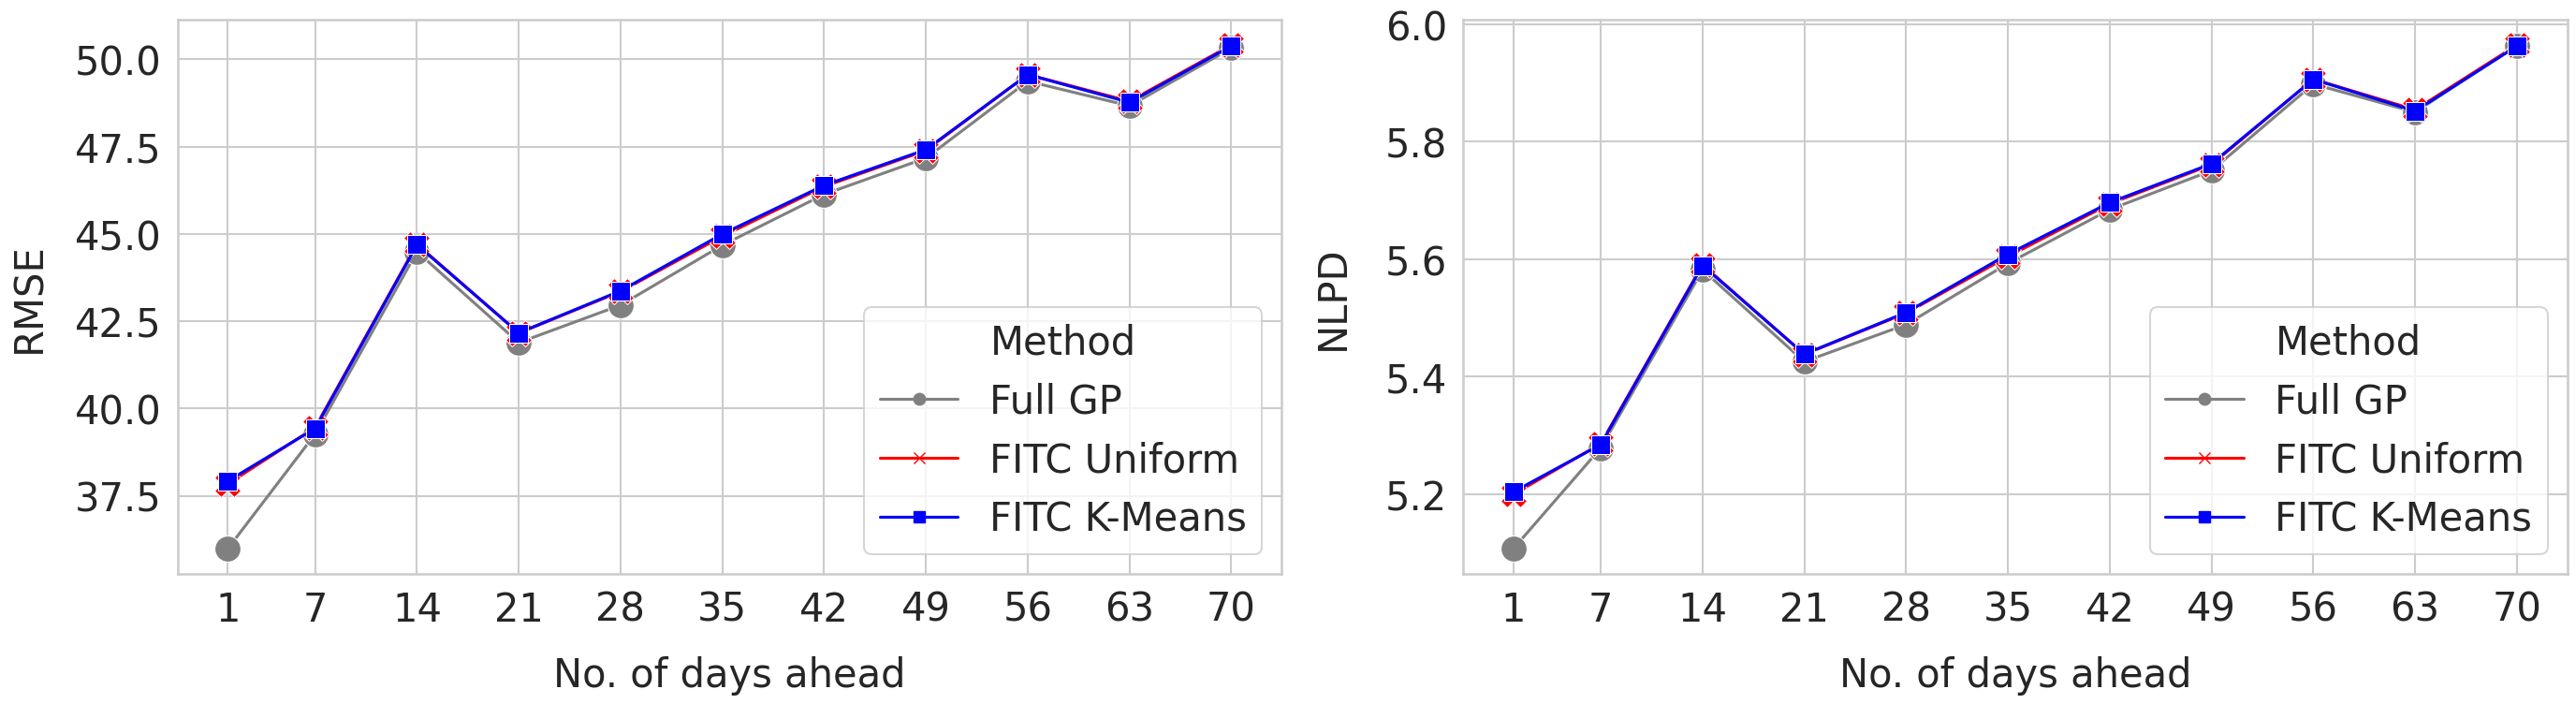

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data_updated = {
    "Time Step": [1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
    "Full_GP_RMSE": [35.99416926, 39.27244411, 44.49418441, 41.88831563, 42.96337381, 44.67916376, 46.13445588, 47.17310439, 49.37442324, 48.666365, 50.32118574],
    "FITC_Uniform_RMSE": [37.84758665, 39.46148118, 44.70845726, 42.16100175, 43.35422354, 44.93504922, 46.35894448, 47.39267484, 49.5661852, 48.79889574, 50.41006879],
    "FITC_K_Means_RMSE": [37.92772416, 39.43536784, 44.69013985, 42.16931909, 43.37201724, 44.99858126, 46.39320021, 47.4155605, 49.56237496, 48.76707774, 50.3845121],
    "Full_GP_NLPD": [5.107589151, 5.278766169, 5.581862458, 5.425609055, 5.488920072, 5.592803698, 5.684501804, 5.750797116, 5.898122274, 5.850185358, 5.963816013],
    "FITC_Uniform_NLPD": [5.199938364, 5.286012165, 5.590577759, 5.437931958, 5.50831437, 5.604543079, 5.694177506, 5.760997215, 5.906347929, 5.854296811, 5.964536785],
    "FITC_K_Means_NLPD": [5.204130409, 5.28459551, 5.589457012, 5.43842311, 5.509386429, 5.60849373, 5.696378674, 5.762497189, 5.906093428, 5.852161937, 5.962767755]
}

df_updated = pd.DataFrame(data_updated)
df_updated['Time Step'] = pd.Categorical(df_updated['Time Step'], categories=[1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70], ordered=True)

handles_updated = [
    Line2D([], [], color='grey', marker='o', linestyle='-', label='Full GP'),
    Line2D([], [], color='red', marker='x', linestyle='-', label='FITC Uniform'),
    Line2D([], [], color='blue', marker='s', linestyle='-', label='FITC K-Means')
]

fig, axs = plt.subplots(1, 2, figsize=(28, 8))

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["grey", "red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['Full_GP_RMSE', 'FITC_Uniform_RMSE', 'FITC_K_Means_RMSE']), ax=axs[0], markersize=20)
axs[0].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[0].set_ylabel('RMSE', fontsize=30, labelpad=20)
axs[0].legend(handles=handles_updated, title='Method', title_fontsize=30, fontsize=30)
axs[0].tick_params(labelsize=30)
axs[0].set_xticks(df_updated['Time Step'])

sns.lineplot(x='Time Step', y='value', hue='variable', palette=["grey", "red", "blue"], style='variable', markers=True, dashes=False, data=pd.melt(df_updated, id_vars='Time Step', value_vars=['Full_GP_NLPD', 'FITC_Uniform_NLPD', 'FITC_K_Means_NLPD']), ax=axs[1], markersize=20)
axs[1].set_xlabel('No. of days ahead', fontsize=30, labelpad=20)
axs[1].set_ylabel('NLPD', fontsize=30, labelpad=25)
axs[1].legend(handles=handles_updated, title='Method', title_fontsize=30, fontsize=30)
axs[1].tick_params(labelsize=30)
axs[1].set_xticks(df_updated['Time Step'])

plt.tight_layout()
plt.show()